In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre
from tqdm import tqdm

import mu2

import constants as const
from interaction import potential
from counterterm import local_LO_counterterm
from mottmassey import mm_potential

gr = 4/3
h = 3

plt.style.use('science')

In [2]:
lo_rg_flow = np.loadtxt('rgflow_local_lo_a0_fix.txt')
nlo_rg_flow = np.loadtxt('rgflow_local_nlo_a0_B6_fix.txt')

In [25]:
deltas_lo = np.loadtxt('phase_shifts_lo.txt')
ks = deltas_lo[:, 0]
deltas_lo = deltas_lo[:, 1:].T

deltas_nlo = np.loadtxt('phase_shifts_nlo.txt')[:, 1:].T
deltas_mm = np.loadtxt('phase_shifts_mott_massey.txt')[:, 1]
deltas_flambaum = np.loadtxt('flambaum_deltas.txt')[:, 1:].T

In [26]:
ii = np.where(const.BETA4/lo_rg_flow[:, 0] < 30)[0]

In [27]:
def find_minus_to_plus(x):
    n = x.size
    indices = []
    for i in range(n-1):
        if np.sign(x[i]) == -1 and np.sign(x[i+1]) == 1:
            indices.append(i+1)
    return indices

def shift(x):
    xp = x.copy()
    indices = find_minus_to_plus(xp)
    i = 0
    s = 0
    for j in indices:
#         print(i, j, s)
        xp[i:j] -= s*np.pi
        s += 1
        i = j
    xp[j:] -= s*np.pi
    return xp

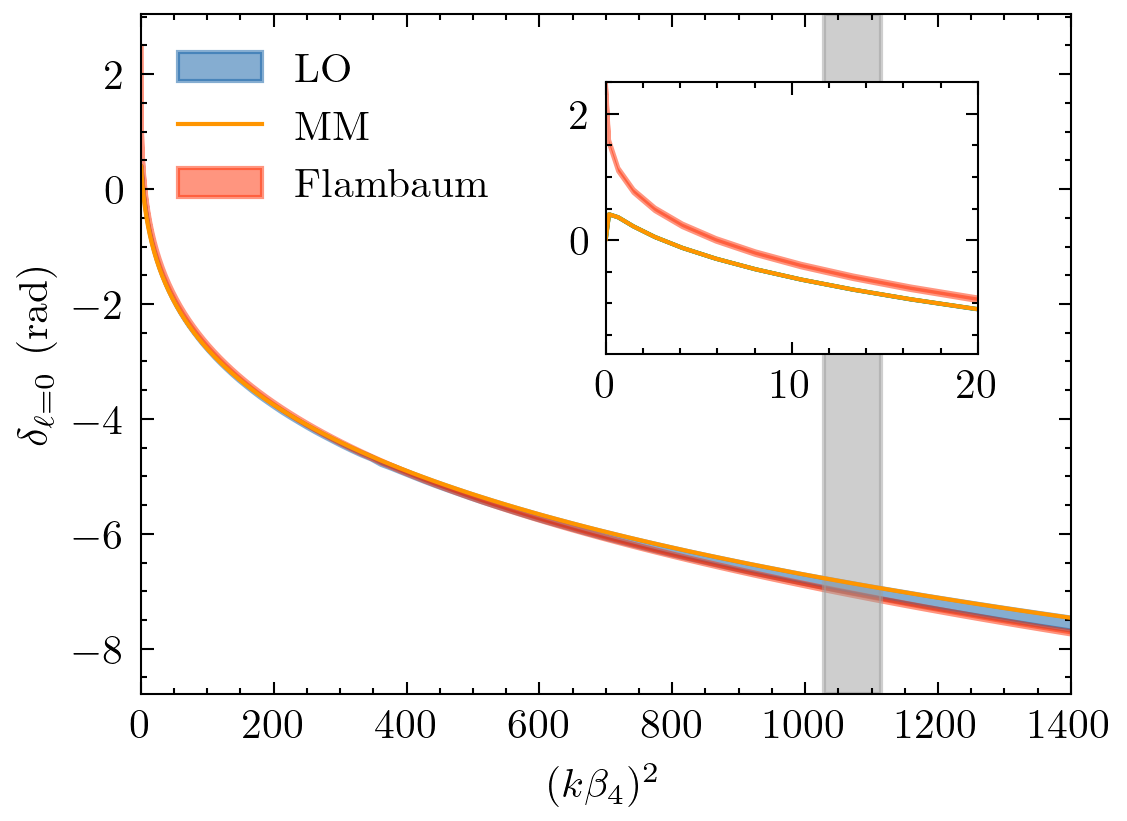

In [116]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=300)
fig.patch.set_facecolor('white')


low_lo, med_lo, high_lo = np.quantile(deltas_lo[ii, :], [0.16, 0.5, 0.84], axis=0)
ax.fill_between((ks*const.BETA4)**2, shift(low_lo), shift(high_lo), color='C0', alpha=0.5, label='LO')

low_nlo, med_nlo, high_nlo = np.quantile(deltas_nlo[ii, :], [0.16, 0.5, 0.84], axis=0)
# ax.fill_between((ks*const.BETA4)**2, shift(low_nlo), shift(high_nlo), color='C1', alpha=0.5, label='NLO')
    
ax.plot((ks*const.BETA4)**2, shift(deltas_mm), color='C2', linestyle='-', label='MM')

ax.fill_between((ks*const.BETA4)**2, deltas_flambaum[0, :], deltas_flambaum[2, :], color='C3', alpha=0.5,
                label='Flambaum')

ax.axvspan(((1/1.02) * const.BETA4)**2, ((1/0.98) * const.BETA4)**2, color='C6', alpha=0.5)

ax.legend(loc='upper left')
# ax.set_ylim([-1, 1])
ax.set_xlim([0, 1400])
# ax.set_xscale('log')
ax.set_xlabel(r'$(k\beta_4)^2$')
ax.set_ylabel(r'$\delta_{\ell=0}$ (rad)');

axin = ax.inset_axes([0.5, 0.5, 0.4, 0.4])
axin.fill_between((ks*const.BETA4)**2, shift(low_lo), shift(high_lo), color='C0', alpha=0.5)
axin.fill_between((ks*const.BETA4)**2, shift(low_nlo), shift(high_nlo), color='C1', alpha=0.5)    
axin.plot((ks*const.BETA4)**2, shift(deltas_mm), color='C2', linestyle='-')
axin.fill_between((ks*const.BETA4)**2, deltas_flambaum[0, :], deltas_flambaum[2, :], color='C3', alpha=0.5)
axin.set_xlim([0, 20])
axin.set_ylim([-1.8, 2.5])
# ax.indicate_inset_zoom(axin, edgecolor="black")

plt.savefig('figures/deltas.pdf')

In [78]:
deltas_lo_shifted = np.array([shift(row) for row in deltas_lo])[ii, :]
deltas_nlo_shifted = np.array([shift(row) for row in deltas_nlo])[ii, :]

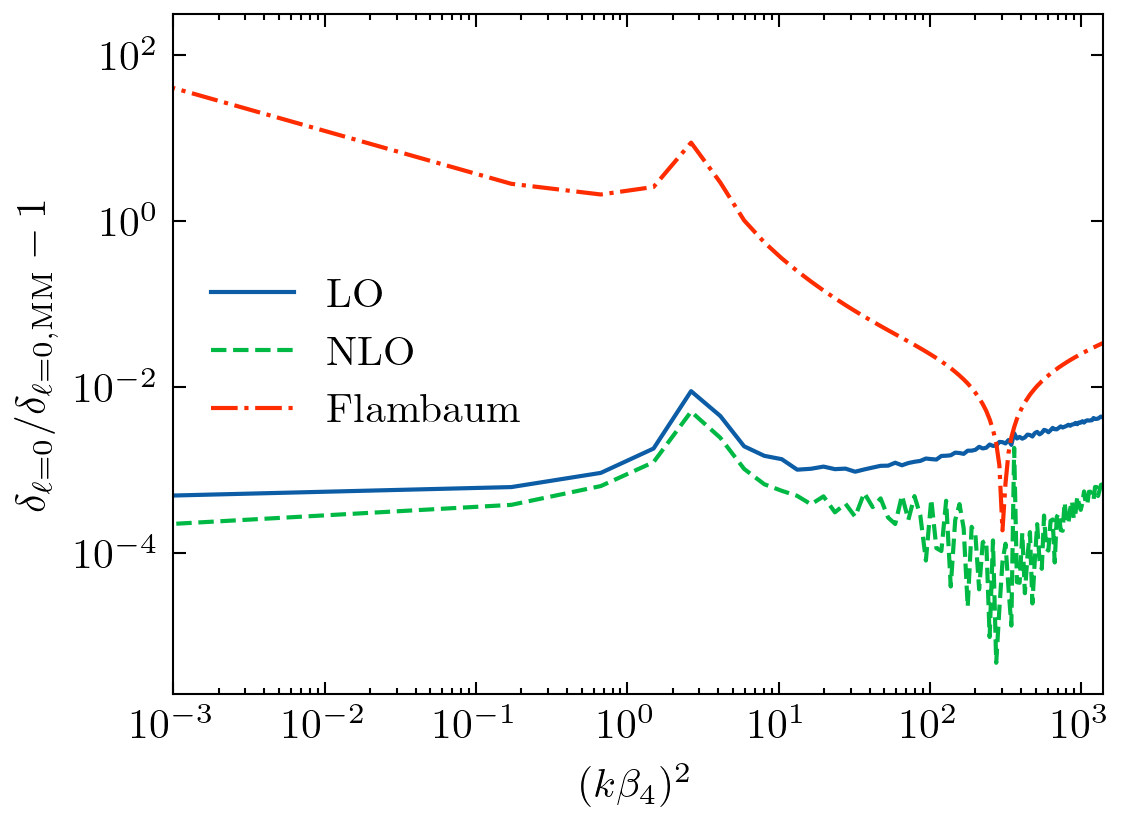

In [98]:
exact = shift(deltas_mm)

fig, ax = plt.subplots(figsize=(gr*h, h), dpi=300)
fig.patch.set_facecolor('white')


low_lo, med_lo, high_lo = np.quantile(deltas_lo[ii, :], [0.16, 0.5, 0.84], axis=0)
ax.plot((ks*const.BETA4)**2, np.abs(shift(med_lo)/exact - 1), color='C0', label='LO', linestyle='-')

low_nlo, med_nlo, high_nlo = np.quantile(deltas_nlo[ii, :], [0.16, 0.5, 0.84], axis=0)
ax.plot((ks*const.BETA4)**2, np.abs(shift(med_nlo)/exact - 1), color='C1', label='NLO', linestyle='--')
    
# ax.plot((ks*const.BETA4)**2, shift(deltas_mm), color='C2', linestyle='--', label='MM')

ax.plot((ks*const.BETA4)**2, np.abs(deltas_flambaum[1, :]/exact - 1), color='C3', label='Flambaum', linestyle='-.')

ax.legend()
# ax.set_ylim([-1, 1])
ax.set_xlim([0.001, 1400])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$(k\beta_4)^2$')
ax.set_ylabel(r'$\delta_{\ell=0}/\delta_{\ell=0,{\rm MM}}-1$');

plt.savefig('figures/deltas_relative.pdf')

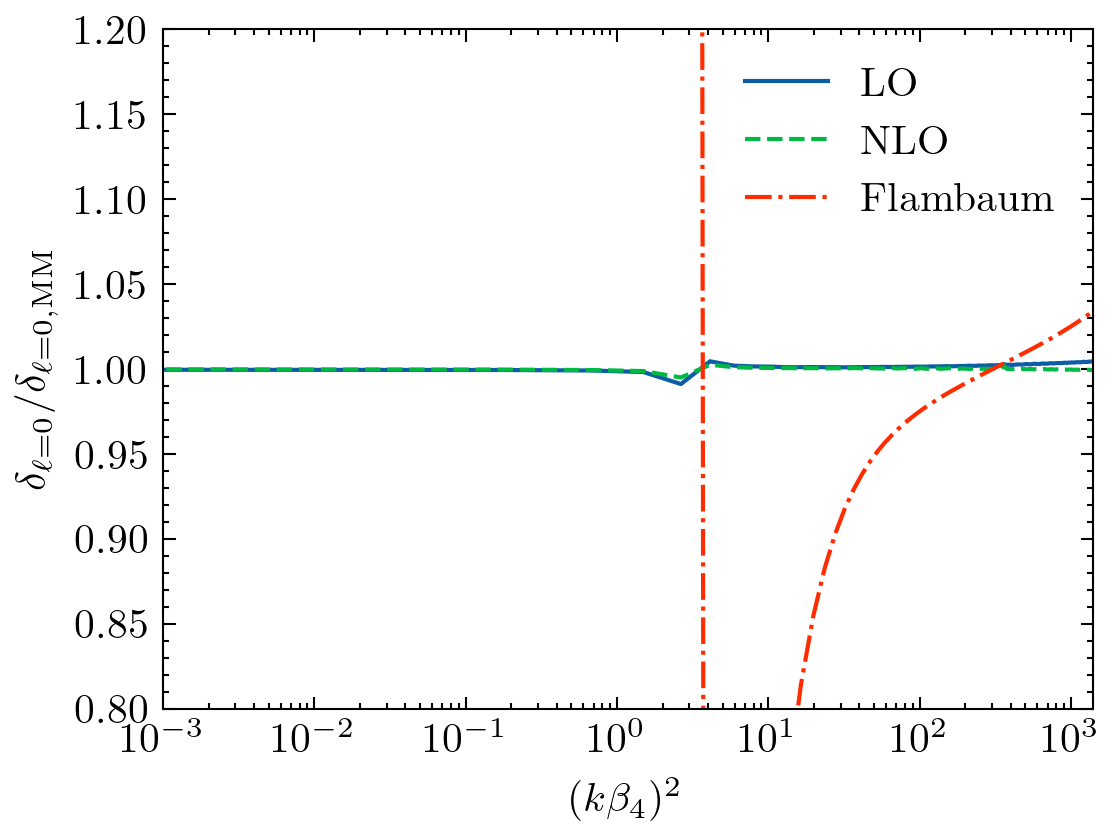

In [68]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=300)
fig.patch.set_facecolor('white')


i = 0
j = 1
ax.plot((ks*const.BETA4)**2, shift(med_lo)/exact, color='C0', label='LO', linestyle='-')

low_nlo, med_nlo, high_nlo = np.quantile(deltas_nlo[ii, :], [0.16, 0.5, 0.84], axis=0)
ax.plot((ks*const.BETA4)**2, shift(med_nlo)/exact, color='C1', label='NLO', linestyle='--')
    
# ax.plot((ks*const.BETA4)**2, shift(deltas_mm), color='C2', linestyle='--', label='MM')

ax.plot((ks*const.BETA4)**2, deltas_flambaum[1, :]/exact, color='C3', label='Flambaum', linestyle='-.')

ax.legend()
ax.set_ylim([0.8, 1.2])
ax.set_xlim([0.001, 1400])
ax.set_xscale('log')
ax.set_xlabel(r'$(k\beta_4)^2$')
ax.set_ylabel(r'$\delta_{\ell=0}/\delta_{\ell=0,{\rm MM}}$');

plt.savefig('figures/deltas_lepage.pdf')

In [103]:
(1/np.sqrt(2*const.MU*1e-4))**4

442.23035482111385